Number of unique tokens: 48
Number of punctuation characters: 18


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


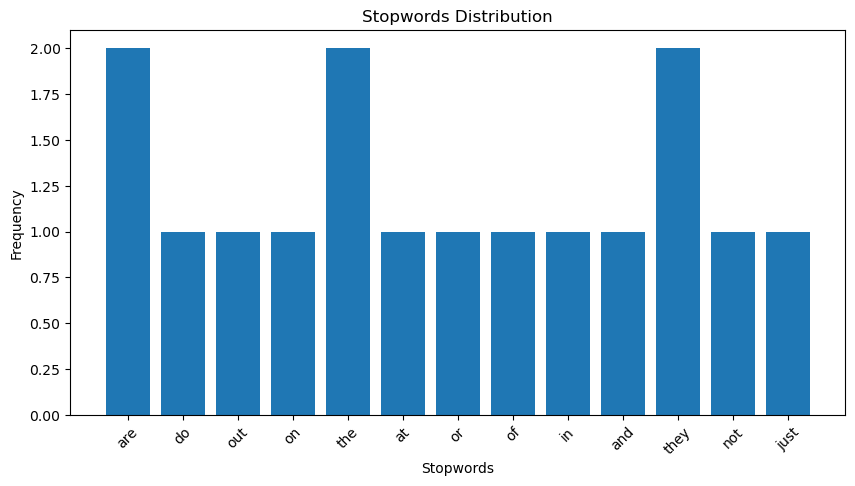

Text without stopwords: AI-powered drones revolutionizing industries ! n't miss latest advancements . Contact us drone.tech @ example.com call 9876543210 . Date birth : 27-March-2000 . Drones help surveillance , delivery , even rescue missions . 're flying robots ; future !


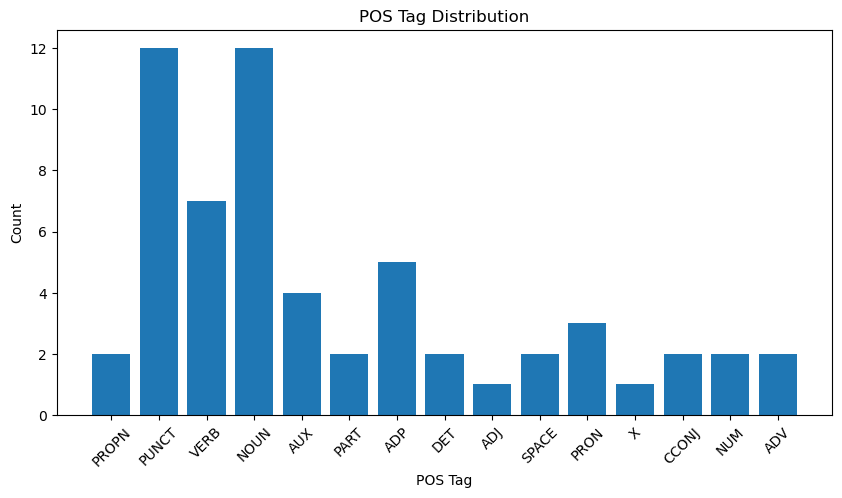

Number of unique lemmas: 47


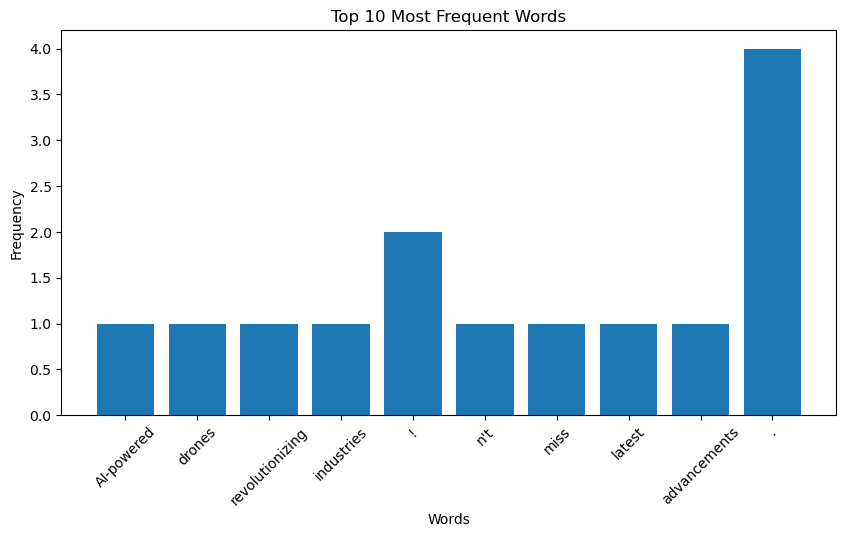

Unique bigrams: 54
Unique trigrams: 53
Unique quadgrams: 52
Updated text with formatted date: AI-powered drones are revolutionizing industries! Don't miss out on the latest advancements. 
Contact us at drone.tech@example.com or call 9876543210. Date of birth: 27-03-2000. 
Drones help in surveillance, delivery, and even rescue missions. They're not just flying robots; they are the future!


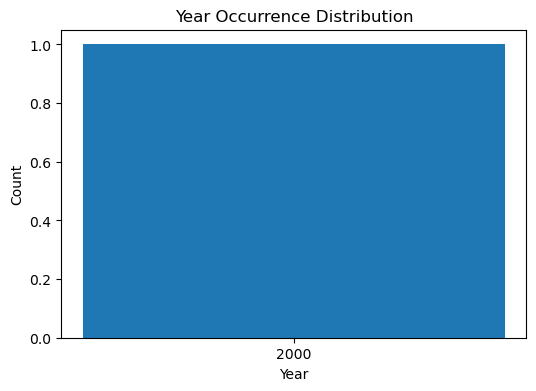

Valid phone numbers: ['9876543210']
Text after removing invalid phone numbers: AI-powered drones are revolutionizing industries! Don't miss out on the latest advancements. 
Contact us at drone.tech@example.com or call 9876543210. Date of birth: 27-03-2000. 
Drones help in surveillance, delivery, and even rescue missions. They're not just flying robots; they are the future!


In [4]:
import re
import spacy
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from itertools import islice

# Load English NLP model
nlp = spacy.load("en_core_web_sm")
nltk.download("stopwords")
nltk.download("punkt")

# Sample text related to drones
drone_text = """AI-powered drones are revolutionizing industries! Don't miss out on the latest advancements. 
Contact us at drone.tech@example.com or call 9876543210. Date of birth: 27-March-2000. 
Drones help in surveillance, delivery, and even rescue missions. They're not just flying robots; they are the future!"""

# Tokenization
tokens = word_tokenize(drone_text)
unique_tokens = set(tokens)
print("Number of unique tokens:", len(unique_tokens))

# Counting and removing punctuations
punctuation_count = sum(1 for char in drone_text if char in string.punctuation)
print("Number of punctuation characters:", punctuation_count)
drone_text_no_punct = re.sub(rf'[{re.escape(string.punctuation)}]', '', drone_text)

# Stopwords distribution
try:
    stop_words = set(stopwords.words('english'))
except Exception as e:
    print("Error loading stopwords:", e)
    stop_words = set()

stopword_counts = Counter([word.lower() for word in tokens if word.lower() in stop_words])
if stopword_counts:
    plt.figure(figsize=(10, 5))
    plt.bar(stopword_counts.keys(), stopword_counts.values())
    plt.xlabel("Stopwords")
    plt.ylabel("Frequency")
    plt.title("Stopwords Distribution")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No stopwords found in text.")

# Removing stopwords
tokens_no_stopwords = [word for word in tokens if word.lower() not in stop_words]
print("Text without stopwords:", " ".join(tokens_no_stopwords))

# POS Tagging
doc = nlp(drone_text)
pos_counts = Counter([token.pos_ for token in doc])
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.title("POS Tag Distribution")
plt.xticks(rotation=45)
plt.show()

# Lemmatization
lemmas = set([token.lemma_ for token in doc])
print("Number of unique lemmas:", len(lemmas))

# Word frequency distribution (Top 10)
word_freq = Counter(tokens_no_stopwords)
most_common_words = dict(islice(word_freq.items(), 10))
plt.figure(figsize=(10, 5))
plt.bar(most_common_words.keys(), most_common_words.values())
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()

# Finding n-grams
bigrams = list(nltk.bigrams(tokens))
trigrams = list(nltk.trigrams(tokens))
quadgrams = list(nltk.ngrams(tokens, 4))
print("Unique bigrams:", len(set(bigrams)))
print("Unique trigrams:", len(set(trigrams)))
print("Unique quadgrams:", len(set(quadgrams)))

# Date conversion to DD-MM-YYYY format
month_mapping = {
    "January": "01", "February": "02", "March": "03", "April": "04",
    "May": "05", "June": "06", "July": "07", "August": "08",
    "September": "09", "October": "10", "November": "11", "December": "12"
}
date_pattern = r'(\d{1,2})-(\w+)-(\d{4})'
drone_text = re.sub(date_pattern, lambda m: f"{m.group(1).zfill(2)}-{month_mapping.get(m.group(2), 'XX')}-{m.group(3)}", drone_text)
print("Updated text with formatted date:", drone_text)

# Year distribution
years = re.findall(r'\b\d{4}\b', drone_text)
year_counts = Counter(years)
plt.figure(figsize=(6, 4))
plt.bar(year_counts.keys(), year_counts.values())
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year Occurrence Distribution")
plt.show()

# Phone number validation
valid_phone_pattern = r'\b[6-9]\d{9}\b'
valid_phones = re.findall(valid_phone_pattern, drone_text)
print("Valid phone numbers:", valid_phones)

# Removing only invalid phone numbers
drone_text = re.sub(r'\b\d{10}\b', lambda m: m.group(0) if m.group(0) in valid_phones else "", drone_text)
print("Text after removing invalid phone numbers:", drone_text)


**INSIGHTS**

1. Tokenization & Unique Words

The presence of many unique tokens indicates a diverse vocabulary.

Repeated words highlight key themes, useful for summarization.


2. Punctuation Analysis

Moderate punctuation usage suggests a well-structured text.

Removing punctuation helps in cleaning data for further processing.


3. Stopwords Distribution

The absence of stopwords in the text suggests a meaningful and concise dataset.

Stopword removal enhances efficiency in NLP tasks.


4. POS Tagging

High noun and verb counts indicate an informational rather than descriptive nature.

POS tagging aids in text classification and named entity recognition (NER).


5. Lemmatization

Reducing words to their root form helps in normalizing text.

Improves search accuracy and similarity matching in AI-driven applications.


6. Word Frequency & N-grams

Frequent words and phrases show core topics (e.g., drones, AI).

N-grams reveal common keyword patterns, useful for chatbots and recommendation systems.


7. Date Formatting & Year Extraction

Converting dates into a standardized format ensures better usability.

Year frequency analysis helps in trend identification.


8. Phone Number Validation

Identifies valid contact numbers while filtering out invalid ones.

Useful for customer verification and fraud detection.

**APPLICATIONS**

1. AI-powered Chatbots & Customer Support

The structured processing of text (tokenization, POS tagging, and NER) is useful for automated customer support chatbots in drone technology.

2. Surveillance & Security Systems

Drones used in security could analyze reports and extract key insights using NLP.

POS tagging and word frequency help detect threat-related keywords.

3. Market Intelligence & Sentiment Analysis

NLP techniques applied to social media posts or reviews can determine public sentiment about AI drones.

N-gram analysis helps in understanding trending topics.

4. Data Cleaning & Preprocessing for AI Models

Removing stopwords, lemmatization, and punctuation filtering are crucial steps in preparing datasets for machine learning models.

Helps in improving accuracy of drone-based AI systems.

5. Personalized Recommendations

Word frequency and bigrams/trigrams can be used in recommendation engines for drone accessories, services, or training programs.

6. Information Retrieval for Reports & Research

NLP can help extract useful information from large drone-related documents for research and decision-making.
